Mengisi nilai variabel KAGGLE_USERNAME dan KAGGLE KEY agar dapat mendownload dataset langsung ke colab

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = 'arfalrazya'
os.environ['KAGGLE_KEY'] = '4ec402e83cc87e2b5a7e2e23d82c40f2'

Mendownload datasets dengan API yang telah disediakan di halaman dataset

In [2]:
!kaggle datasets download -d mathchi/diabetes-data-set

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 14.7MB/s]


Melakukan Ekstraksi datasets dengan command unzip

In [3]:
!unzip 'diabetes-data-set.zip' -d /content/

Archive:  diabetes-data-set.zip
  inflating: /content/diabetes.csv   


# Import Library yang diperlukan

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

# Data Loading
Ubah data csv menjadi dataframe dengan fungsi **read_csv**

In [5]:
dataframe = pd.read_csv('/content/diabetes.csv')
dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Exploratory Data Analysis - Deskripsi Variabel
Melakukan pengecekan infromasi pada dataframe menggunakan fungsi **info()**. Terlihat bahwa terdapat dua kolom yang bertipe int. Dari datasets yang telah di-*load* terdapat sembilan buah kolom. Dimana pada kolom output merupakan label dari datasets

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Melihat deskripsi statistik pada data dengan fungsi **describe()**. Dari deskripsi statistik tersebut nilai BMI dan BloodPressure terdapat *row* yang bernilai 0



In [7]:
dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Data Preparation
##Mengatasi Missing Value
Menghitung jumlah baris yang nilai pada kolom BMI dan BloodPressure bernilai 0. Perhitungan dilakukan dengan menjumlahkan baris yang bernilai 0 pada kolom tersebut dengan fungsi **sum()**.

In [8]:
BMI = (dataframe.BMI == 0).sum()
BloodPress = (dataframe.BloodPressure == 0).sum()

print(BMI)
print(BloodPress)

11
35


Membuat datasets baru dengan nilai baris yang memiliki nilai  nilai BMI & BloodPressure bernilai tidak 0. Pembuatan datasets baru dilakukan dengan menggunakan fungsi **loc()**. Dari hasil pembuatan dataframe baru terlihat bahwa terdapat pengurangan jumlah baris yang dilihat menggunakan fungsi **shape**.

In [9]:
dataframe = dataframe.loc[(dataframe[['BMI','BloodPressure']]!=0).all(axis=1)]

dataframe.shape

(729, 9)

##Menangani Outliers
Menggunakan fungsi **boxplot()**, dilakukan visualisasi dengan diagram box plot untuk melihat setiap pencilan pada kolom(fitur) datasets.

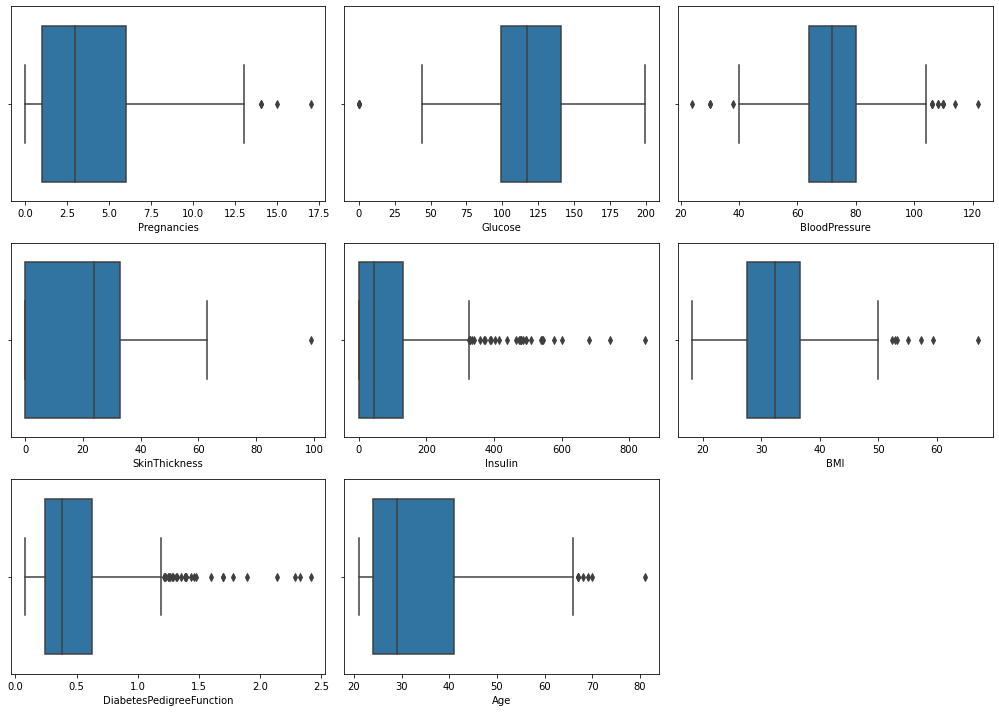

In [10]:
features = ['Pregnancies','Glucose','BloodPressure',
            'SkinThickness','Insulin','BMI',
            'DiabetesPedigreeFunction','Age']

RP=plt.figure(figsize=(14,10))
for i, feature in enumerate(features):
  r=RP.add_subplot(3,3,i+1)
  sns.boxplot(x=dataframe[feature])
RP.tight_layout()

Dari hasil visualisasi dengan box plot terlihat bahwa pada setiap kolom terdapat pencilan. Oleh karena itu dengan menggunakan metode IQR  membuang pencilan yang terdapat pada setiap kolom.

In [11]:
Q1 = dataframe.quantile(0.25)
Q3 = dataframe.quantile(0.75)
IQR = Q3-Q1
dataframe=dataframe[~((dataframe<(Q1-1.5*IQR))|(dataframe>(Q3+1.5*IQR))).any(axis=1)]

dataframe.shape

(639, 9)

##Univariate Analysis 
Univariate analisis dilakukan dengan melakukan visualisasi pada setiap fitur numerik. Visualisasi dilakukan menggunakan fungsi **hist()** untuk menampilkan histogram dari setiap fitur.



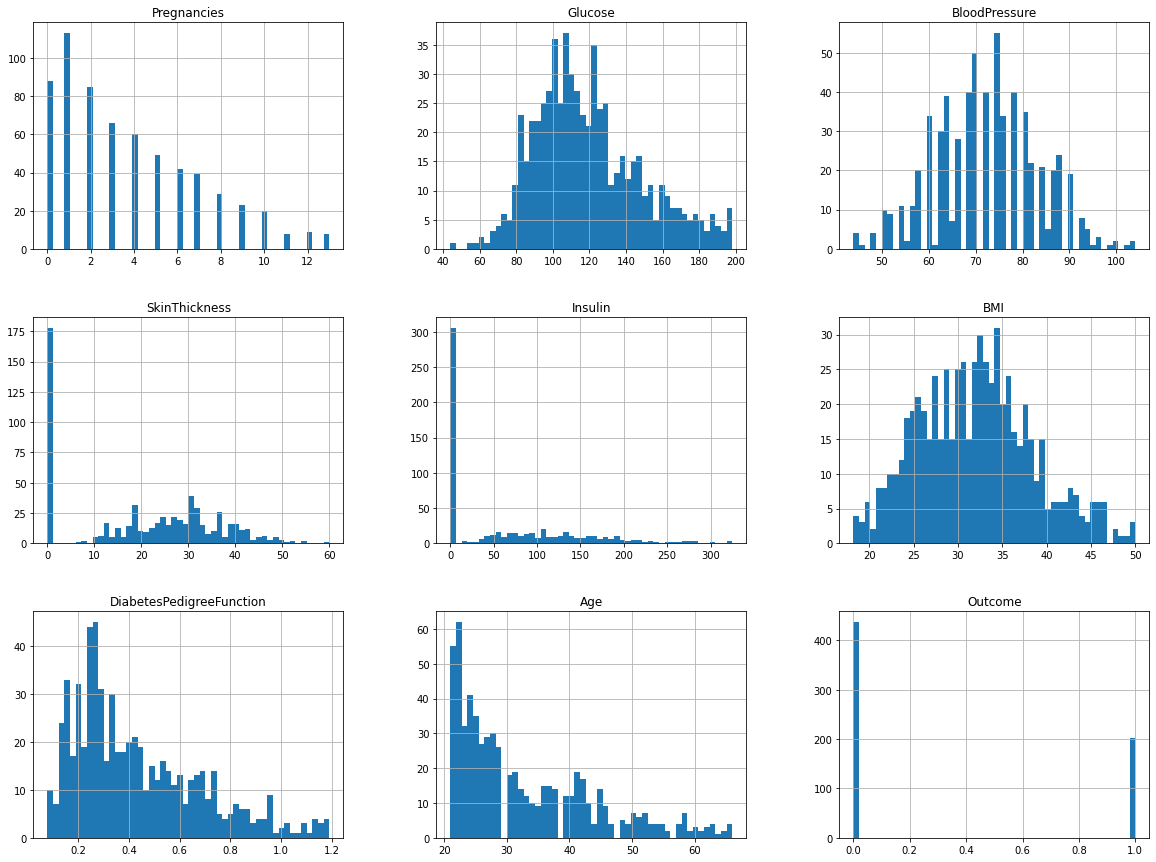

In [12]:
dataframe.hist(bins=50, figsize=(20,15))
plt.show()

#Exploratory Data Analysis - Multivariate Analysis
Melakukan multivariate analysis dengan melihat korelasi setiap fitur dengan label(kolom outcome) menggunakan fungsi corr().

Hasil dari matriks korelasi yang ditampilkan dibawah terliaht bahwa setip fitur memiliki korelasi dengan label. Hal tersebut ditandai dengan tidak adanya nilai 0 pada baris Outcome.

Matriks tersebut juga menunjukkan fitur glucose, BMI dan umur memiliki korelasi tertinggi dengan label. 

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

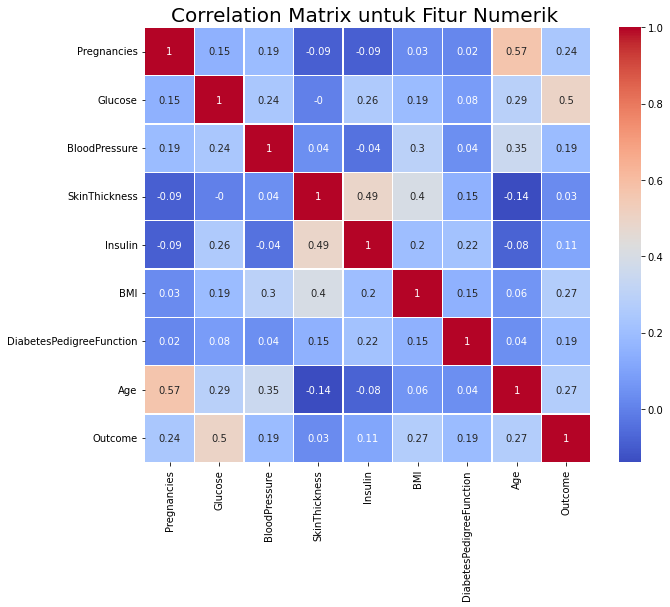

In [13]:
plt.figure(figsize=(10, 8))
correlation_matrix = dataframe.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

#Data Preparation
##Train-Test-Split
Membagi dataset menjadi data train dan test dengan fungsi **train_test_split**. Ukuran yang digunakan adalah 20% untuk data test dan 80% untuk data uji.

In [14]:
from sklearn.model_selection import train_test_split
 
X = dataframe.drop(["Outcome"],axis =1)
y = dataframe["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 639
Total # of sample in train dataset: 511
Total # of sample in test dataset: 128


##Standarisasi 
Melakukan standarisasi dengan **StandardScaler**.  proses standarisasi mengubah nilai rata-rata (mean) menjadi 0 dan nilai standar deviasi menjadi 1

In [15]:
from sklearn.preprocessing import StandardScaler

features = ['Pregnancies','Glucose','BloodPressure',
            'SkinThickness','Insulin','BMI',
            'DiabetesPedigreeFunction','Age']

scaler = StandardScaler()
scaler.fit(X_train[features])
X_train[features] = scaler.transform(X_train.loc[:, features])
X_train[features].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
592,-0.228542,0.454819,0.728757,-1.345510,-0.803875,0.396460,-0.112012,1.021064
364,0.084554,0.970604,0.193322,0.301409,2.931184,0.473287,-0.179161,-0.235981
213,-1.167830,0.729904,-0.609829,0.367285,0.853318,1.656413,0.002535,-0.774715
487,-1.167830,1.864631,0.550279,0.762546,2.574250,2.255659,2.878070,2.278109
207,0.397651,1.486389,2.870494,-1.345510,-0.803875,0.903514,-1.103440,1.739375


#Modeling
##Modeling dengan Algoritma KNeighborsClassifier
Modeling Menggunakan KNeighborsClassifier dilakukan dengan mengimport model dari library sklearn kemudian menentukan jumlah tetangga menjadi 2. Lalu melakukan training dengan data latih

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

##Modeling dengan Algoritma AdaBoostClassifier
Modeling Menggunakan AdaBoostClassifier dengan mengimport model dari library sklearn kemudian menentukan n_estimators menjadi 100, random_state menjadi 0. Lalu melakukan training dengan data latih




In [29]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#Evaluasi

##Scaling data test
Melakukan Scaling dengan **scaler** yang telah dilatih dengan data latih pada data test untuk melakukan prediksi Hal ini harus dilakukan agar skala antara data latih dan data uji sama dan kita bisa melakukan evaluasi.



In [30]:
X_test.loc[:, features] = scaler.transform(X_test[features])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


##Evaluasi Model
Melakukan evaluasi ketiga model kita dengan metrik akurasi menggunakan fungsi **accuracy_score()** dari sklearn.

In [31]:
from sklearn.metrics import accuracy_score

acc = pd.DataFrame(columns=['train', 'test'], index=['KNN','SVC'])
model_dict = {'KNN': knn, 'SVC': svc}

for name, model in model_dict.items():
    acc.loc[name, 'train'] = accuracy_score(y_true=y_train, y_pred=model.predict(X_train))
    acc.loc[name, 'test'] = accuracy_score(y_true=y_test, y_pred=model.predict(X_test))
 
acc

,train,test
KNN,0.812133,0.695312
SVC,0.847358,0.695312


##Visualisasi hasil pengijian
Membuat plot untuk memudahkan membandingkan  akurasi dari model yang telah dilatih.

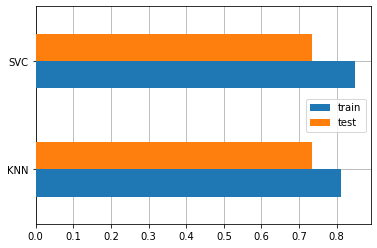

In [27]:
fig, ax = plt.subplots()
acc.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari hasil evaluasi diatas dapat disimpulkan bahwa model dengan algoritma Ada Boost merupakan model yang terbaik karena mendapatkan skor latih yang tidak terpaut jauh dengan skor uji. Sedangkan model dengan algoritma KNN mendapatkan skor akurasi dibawah Algoritma ada boost yang tidak terpaut jauh.